# 시계열 분석(prophet 튜토리얼)

## 간단한 사용법

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 일반적인 sin 그래프

In [8]:
# 0~1을 365*2 등분
time = np.linspace(0, 1, 365*2)
# 2*pi*12*time 값을 sin 함수에 전달한 값
result = np.sin(2*np.pi*12*time)
# date_range로 730일간의 range 날짜 생성
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')


df = pd.DataFrame({'ds' : ds, 'y':result})
df

,ds,y
0,2017-01-01,0.000000e+00
1,2017-01-02,1.032426e-01
2,2017-01-03,2.053818e-01
3,2017-01-04,3.053260e-01
4,2017-01-05,4.020070e-01
...,...,...
725,2018-12-27,-4.020070e-01
726,2018-12-28,-3.053260e-01
727,2018-12-29,-2.053818e-01
728,2018-12-30,-1.032426e-01


<Axes: >

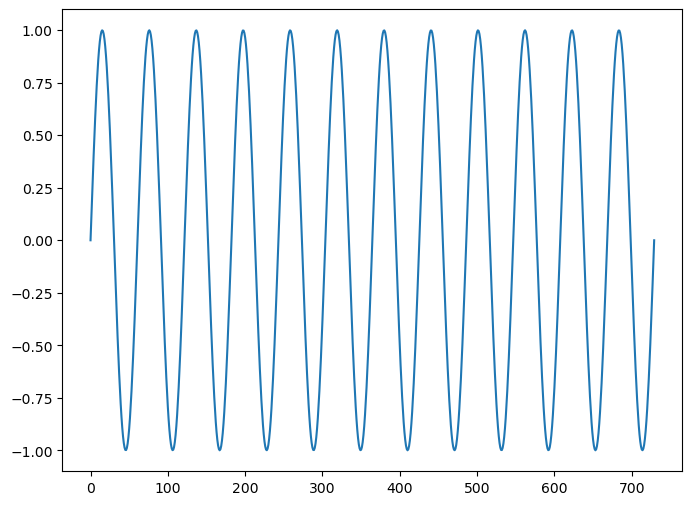

In [10]:
# 730일 간의 sin그래프 시각화
df['y'].plot(figsize=(8,6))

#### prophet을 활용하여 시계열 데이터 예측

In [12]:
# 위 그래프 기준인 데이터프레임을 prophet에 담아 예측을 시도
from prophet import Prophet

# yearly_seasonality : 연 주기성, daily_sasonality : 일 주기성
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:59 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# 730일 이후 30일(periods=30)간 데이터가 어떻게 형성될지 예측
future = m.make_future_dataframe(periods=30)

future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
755,2019-01-26
756,2019-01-27
757,2019-01-28
758,2019-01-29


In [14]:
forecast = m.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-0.000832,0.034867,0.107931,-0.000832,-0.000832,0.071899,0.071899,0.071899,-0.003327,...,-1.072767e-04,-1.072767e-04,-1.072767e-04,0.075334,0.075334,0.075334,0.0,0.0,0.0,0.071067
1,2017-01-02,-0.000807,0.131647,0.209077,-0.000807,-0.000807,0.171989,0.171989,0.171989,-0.003327,...,1.055645e-04,1.055645e-04,1.055645e-04,0.175211,0.175211,0.175211,0.0,0.0,0.0,0.171183
2,2017-01-03,-0.000781,0.229338,0.305294,-0.000781,-0.000781,0.269584,0.269584,0.269584,-0.003327,...,-3.866997e-04,-3.866997e-04,-3.866997e-04,0.273298,0.273298,0.273298,0.0,0.0,0.0,0.268803
3,2017-01-04,-0.000755,0.328921,0.398730,-0.000755,-0.000755,0.365070,0.365070,0.365070,-0.003327,...,-1.941814e-04,-1.941814e-04,-1.941814e-04,0.368592,0.368592,0.368592,0.0,0.0,0.0,0.364315
4,2017-01-05,-0.000730,0.419759,0.492206,-0.000730,-0.000730,0.456790,0.456790,0.456790,-0.003327,...,3.760731e-07,3.760731e-07,3.760731e-07,0.460117,0.460117,0.460117,0.0,0.0,0.0,0.456060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2019-01-26,0.008726,0.511132,0.581174,0.008673,0.008780,0.534298,0.534298,0.534298,-0.003327,...,3.873402e-04,3.873402e-04,3.873402e-04,0.537238,0.537238,0.537238,0.0,0.0,0.0,0.543024
756,2019-01-27,0.008755,0.417087,0.491498,0.008697,0.008812,0.445244,0.445244,0.445244,-0.003327,...,-1.072767e-04,-1.072767e-04,-1.072767e-04,0.448678,0.448678,0.448678,0.0,0.0,0.0,0.453999
757,2019-01-28,0.008784,0.324760,0.395921,0.008721,0.008847,0.352085,0.352085,0.352085,-0.003327,...,1.055645e-04,1.055645e-04,1.055645e-04,0.355306,0.355306,0.355306,0.0,0.0,0.0,0.360869
758,2019-01-29,0.008813,0.226027,0.300311,0.008746,0.008880,0.254381,0.254381,0.254381,-0.003327,...,-3.866997e-04,-3.866997e-04,-3.866997e-04,0.258095,0.258095,0.258095,0.0,0.0,0.0,0.263194


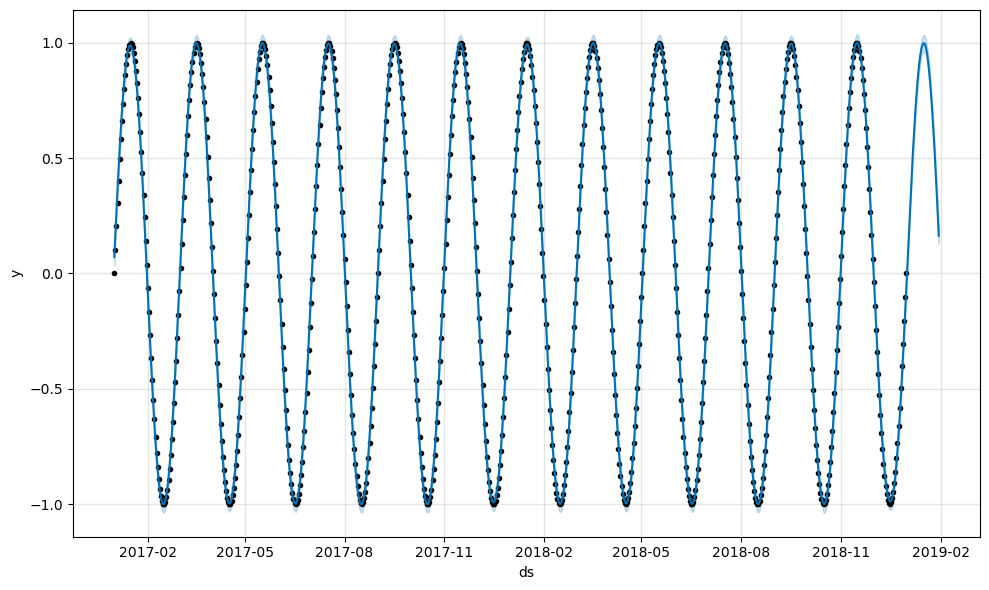

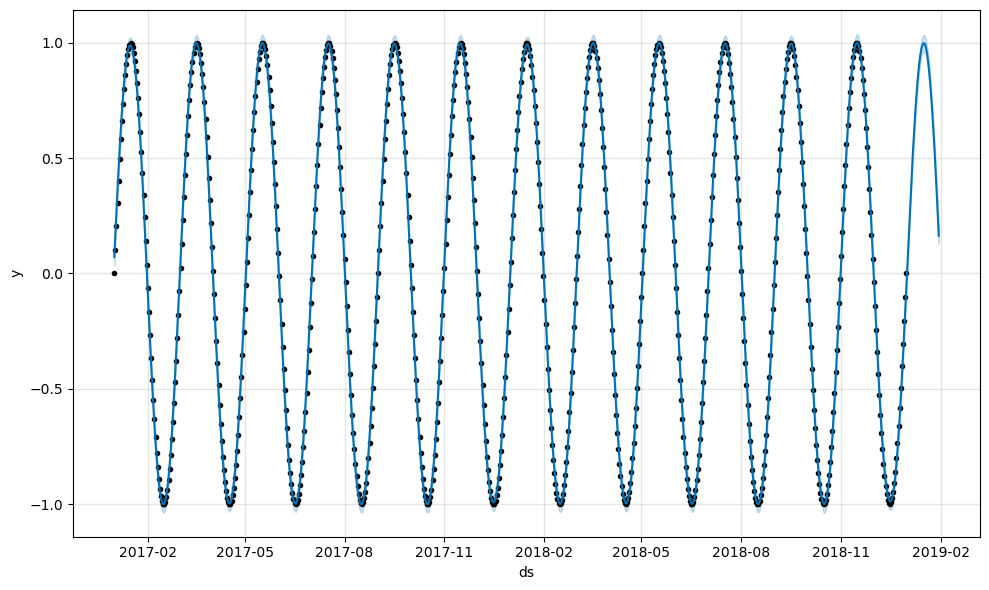

In [16]:
m.plot(forecast)

- 그래프 위의 점들은 기존 데이터프레임의 실제 데이터들이다.
- 점이 없는 sin선은 기존 데이터프레임에 없던 730일 이후 30일간의 예측값이다.

### 임의의 bias를 추가한 sin 그래프

<Axes: >

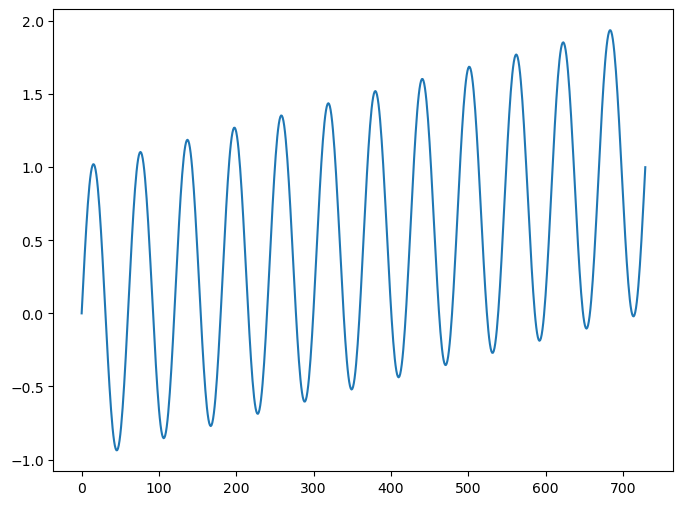

In [22]:
time = np.linspace(0, 1, 365*2)

# 편향으로 sin그래프에 time을 더해줌
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')

df = pd.DataFrame({'ds' : ds, 'y':result})
df['y'].plot(figsize=(8,6))

#### prophet을 활용한 시계열 데이터 예측

00:40:54 - cmdstanpy - INFO - Chain [1] start processing
00:40:54 - cmdstanpy - INFO - Chain [1] done processing


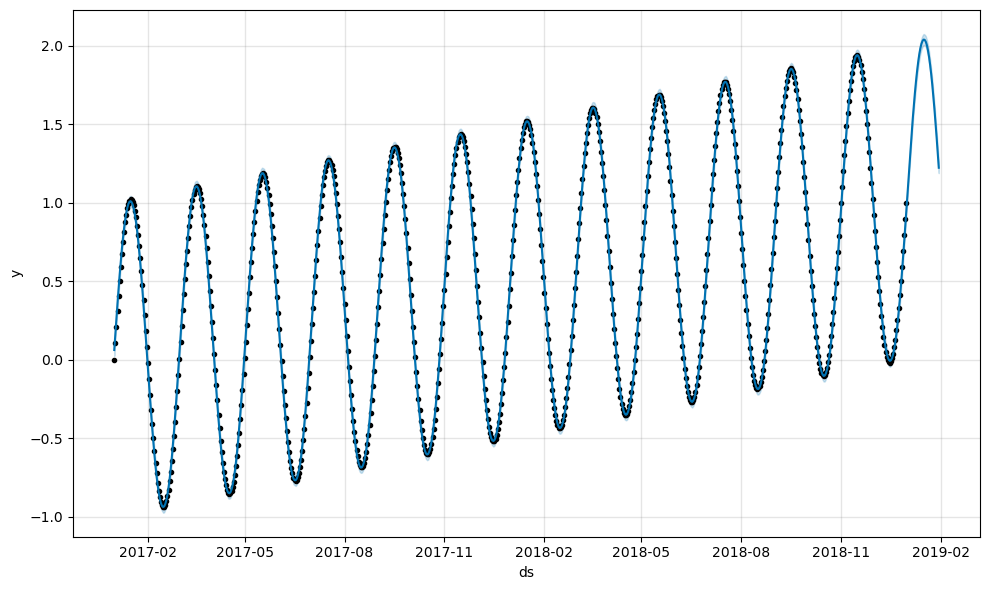

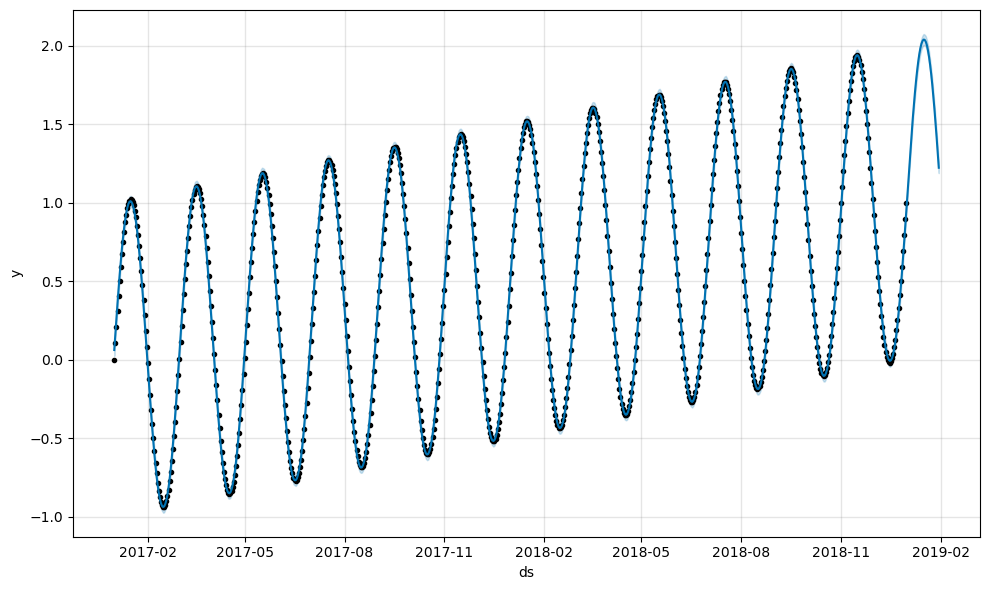

In [23]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

### 임의의 노이즈를 추가한 sin 그래프

<Axes: >

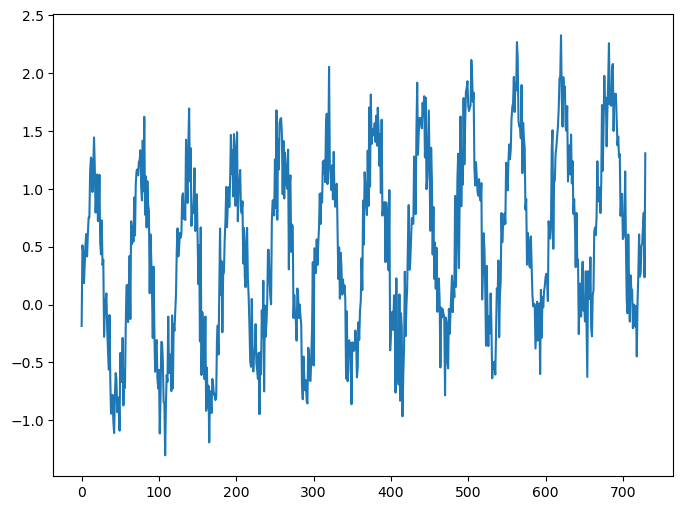

In [25]:
time = np.linspace(0, 1, 365*2)

# sin 그래프에 노이즈로 난수를 더해줌
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')

df = pd.DataFrame({'ds':ds, 'y':result})
df['y'].plot(figsize=(8,6))

#### prophet을 활용한 시계열 데이터 예측

00:42:48 - cmdstanpy - INFO - Chain [1] start processing
00:42:48 - cmdstanpy - INFO - Chain [1] done processing


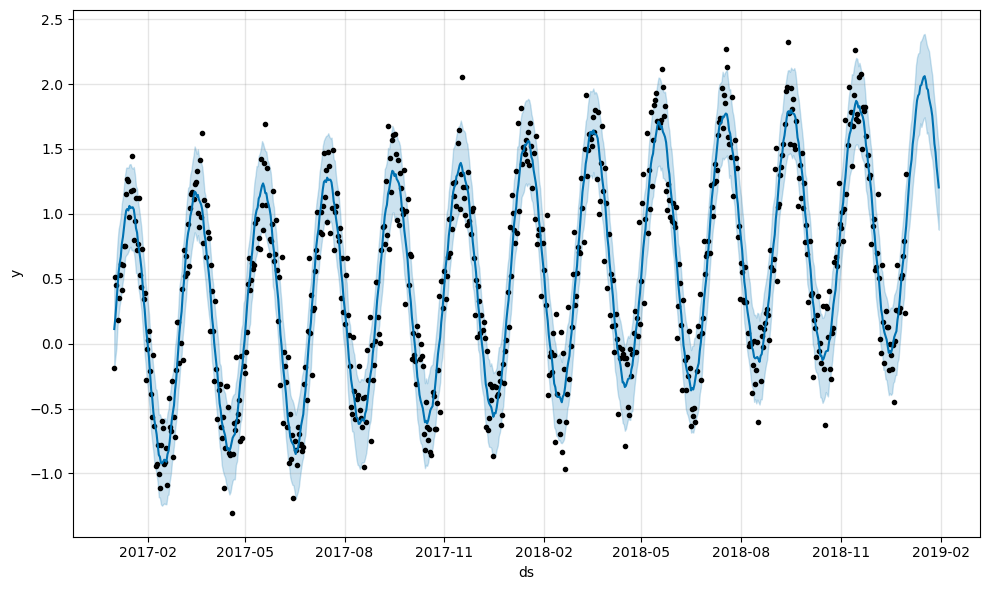

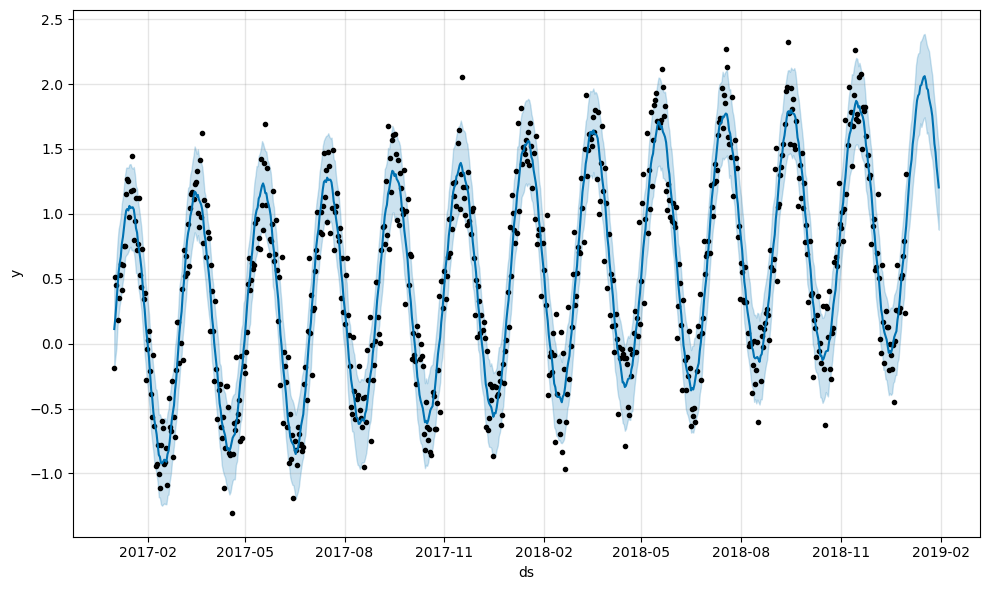

In [27]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

---
## 웹 유입량 데이터를 이용한 시계열 분석
- data : data/data05/05_PinkWink_Web_Traffic.csv

In [28]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

rc("font", family="Arial Unicode MS")

## 데이터 확인

In [30]:
pinkwink_web = pd.read_csv(
    '../data/data05/05_PinkWink_Web_Traffic.csv',
    encoding='utf-8',
    thousands=',',
    names=['date', 'hit'],  # hit : 웹사이트 방문객 수
    index_col = 0
)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<Axes: xlabel='date'>

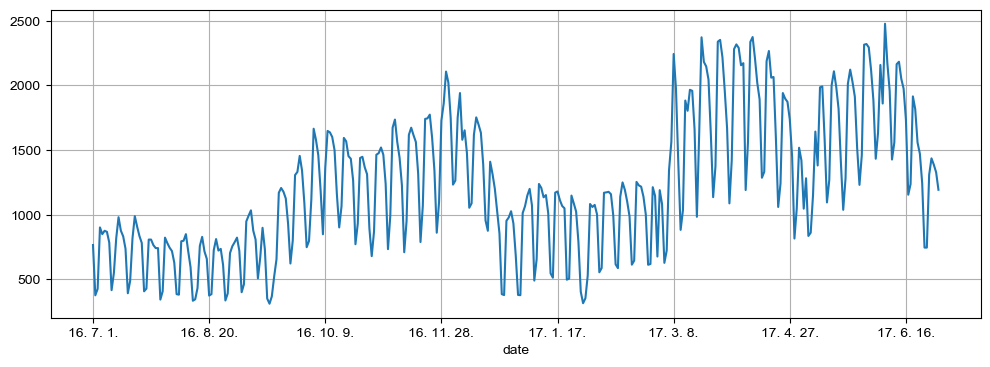

In [31]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

## numpy를 활용한 trend 분석

- trend 분석을 시각화하기 위한 x축 값(fx) 생성

In [32]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

- 오차를 계산할 함수 생성 => RMSE(Root Mean Square Error) : 평균 제곱근 오차
- trend와 데이터의 실제값 간의 차이를 계산
- f(x) : 예측값
- y : 실제값

In [33]:
def error(f, x, y) :
    return np.sqrt(np.mean((f(x) - y) ** 2))

- trend을 나타낼 식 생성

In [36]:
# 1차식
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

# 2차식
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

# 3차식
f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

# 15차식
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

- 오차 계산

In [37]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))


430.85973081109637
430.6284101894695
429.53280466762925
330.47773057890595


- 1, 2, 3차식까지는 오차에 큰 변화가 없지만 15차식에서는 오차가 많이 줄었음을 알 수 있다.
- trend 선과 원본 데이터를 함께 시각화해보자

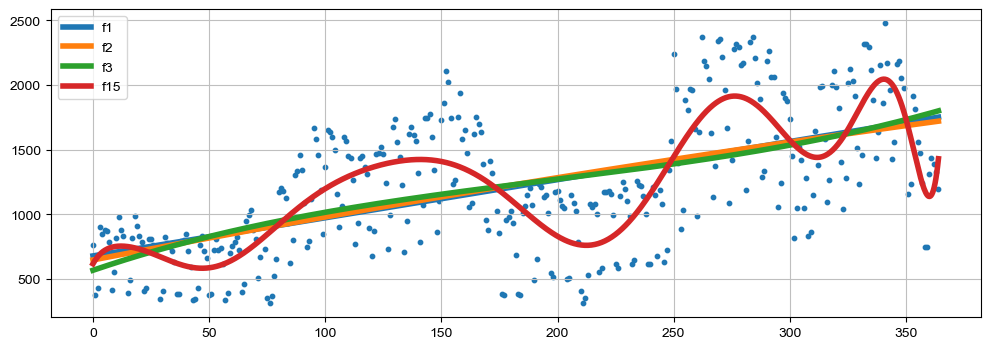

In [38]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

## prophet을 활용한 시계열 데이터 분석
- 기존 데이터프레임의 date 컬럼 값들을 날짜형 데이터로 변경해줘야함

In [46]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)

df.head()

,date,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0


In [47]:
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

df

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
...,...,...
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0


- 새로 정리한 데이터프레임을 prophet에 적용시켜보자
- 데이터프레임의 날짜 이후의 60일간의 y값들을 예측

In [52]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=60)
future

01:35:27 - cmdstanpy - INFO - Chain [1] start processing
01:35:27 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05
...,...
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28


- yhat : 예측 결과
- yhat_lower : 예측 결과의 하한값
- yhat_upper : 예측 결과의 상한값

In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,915.116096,716.822547,1120.447745
421,2017-08-26,500.056403,282.848734,714.338186
422,2017-08-27,632.615310,430.108904,824.469320
423,2017-08-28,1185.287369,966.481397,1387.770485
424,2017-08-29,1221.186928,1023.800980,1433.953685


- 예측 결과가 포함된 데이터프레임 시각화

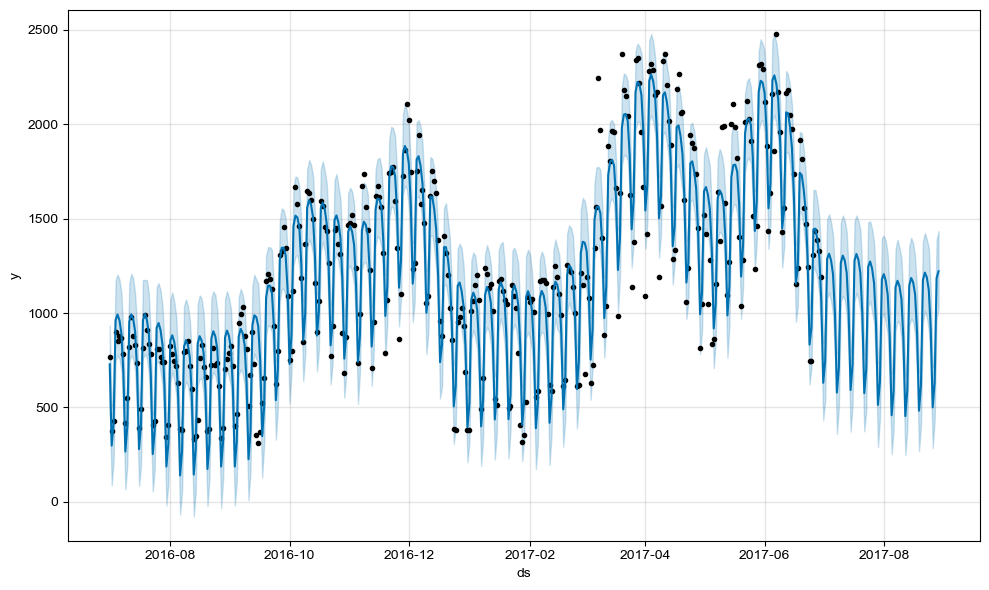

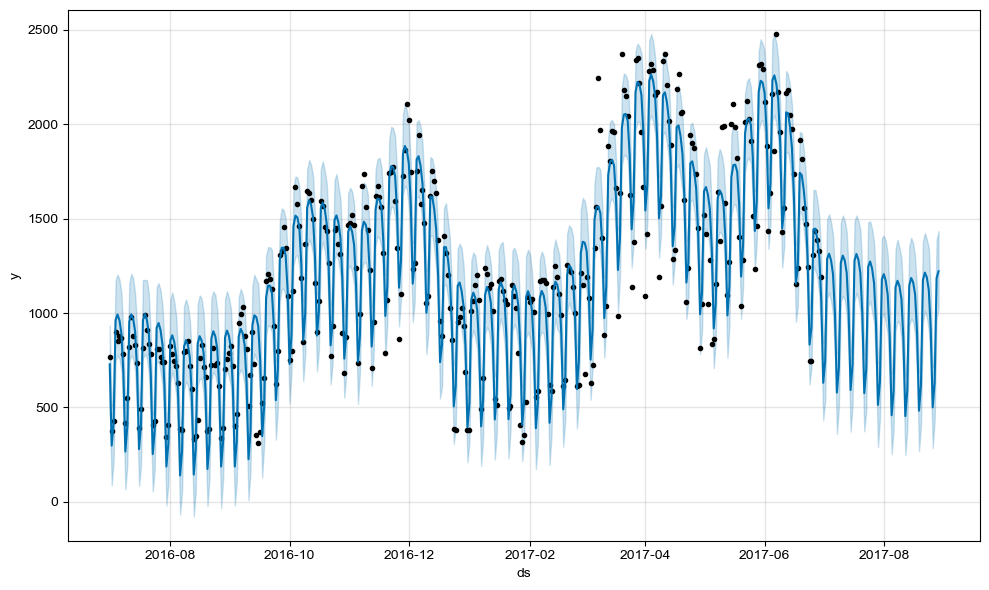

In [50]:
m.plot(forecast)

- plot_components

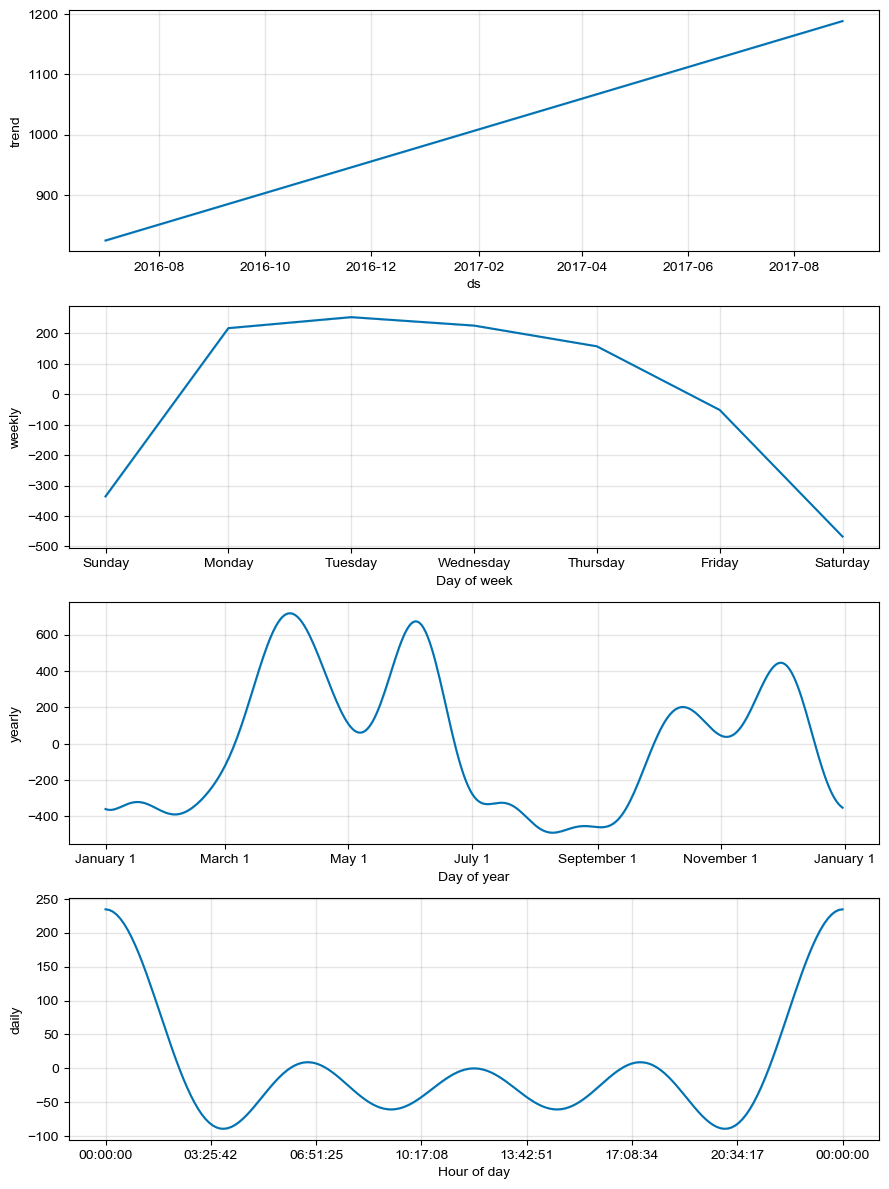

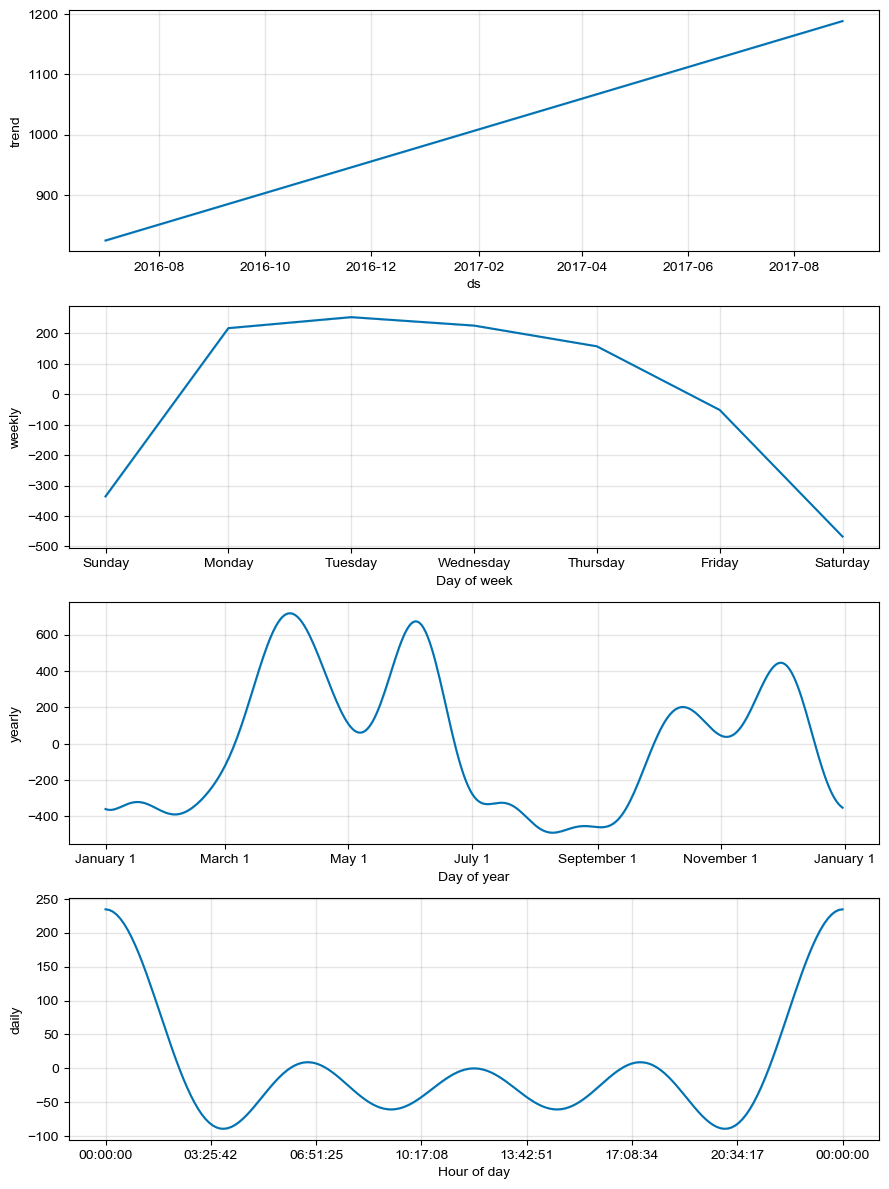

In [51]:
m.plot_components(forecast)